In [0]:
# Exercise 3.1

import numpy as np
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression
numarray = np.array([[0,0], [1,1], [2,2], [3,3], [4,4], [5,5]])

lr = LinearRegression()
lr.fit(numarray[:, 0].reshape(-1, 1), numarray[:, 1].reshape(-1, 1))

#printing coefficients
print(lr.intercept_, lr.coef_)

x_predict = np.array([6, 7, 8, 9, 10])

y_predict = lr.predict(x_predict.reshape(-1, 1))
print(y_predict)

[4.4408921e-16] [[1.]]
[[ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]


In [0]:
numarray = np.array([[0,1], [1,2], [2,3], [3,4], [4,5], [5,6]])

lr = LinearRegression()
lr.fit(numarray[:, 0].reshape(-1, 1), numarray[:, 1].reshape(-1, 1))

#printing coefficients
print(lr.intercept_, lr.coef_)

x_predict = np.array([6, 7, 8, 9, 10])

y_predict = lr.predict(x_predict.reshape(-1, 1))
print(y_predict)

[1.] [[1.]]
[[ 7.]
 [ 8.]
 [ 9.]
 [10.]
 [11.]]


In [0]:
numarray = np.array([[0,0], [1,1], [2,4], [3,9], [4,16], [5,25]])

lr = LinearRegression()
lr.fit(numarray[:, 0].reshape(-1, 1), numarray[:, 1].reshape(-1, 1))

#printing coefficients
print(lr.intercept_, lr.coef_)

x_predict = np.array([6, 7, 8, 9, 10])

y_predict = lr.predict(x_predict.reshape(-1, 1))
print(y_predict)
# Results are incorrect

[-3.33333333] [[5.]]
[[26.66666667]
 [31.66666667]
 [36.66666667]
 [41.66666667]
 [46.66666667]]


In [0]:
from sklearn.preprocessing import PolynomialFeatures

numarray = np.array([[0,0], [1,1], [2,4], [3,9], [4,16], [5,25]])

#using polynomial features
pf = PolynomialFeatures(degree=2)
x_poly = pf.fit_transform(numarray[:, 0].reshape(-1, 1))
lr = LinearRegression()
lr.fit(x_poly, numarray[:, 1].reshape(-1, 1))

#printing coefficients
print(lr.intercept_, lr.coef_)

x_predict = np.array([6, 7, 8, 9, 10])

y_predict = lr.predict(pf.fit_transform(x_predict.reshape(-1, 1)))
print(y_predict)

# Results correct with degree in 2..5

[1.77635684e-15] [[ 0.00000000e+00 -1.55431223e-15  1.00000000e+00]]
[[ 36.]
 [ 49.]
 [ 64.]
 [ 81.]
 [100.]]


In [0]:
numarray = np.array([[0,0], [1,1], [2,8], [3,27], [4,64], [5,125]])

#using polynomial features
pf = PolynomialFeatures(degree=3)
x_poly = pf.fit_transform(numarray[:, 0].reshape(-1, 1))
lr = LinearRegression()
lr.fit(x_poly, numarray[:, 1].reshape(-1, 1))

#printing coefficients
print(lr.intercept_, lr.coef_)

x_predict = np.array([6, 7, 8, 9, 10])

y_predict = lr.predict(pf.fit_transform(x_predict.reshape(-1, 1)))
print(y_predict)

[1.42108547e-14] [[ 0.00000000e+00 -2.44249065e-15  2.63677968e-15  1.00000000e+00]]
[[ 216.]
 [ 343.]
 [ 512.]
 [ 729.]
 [1000.]]


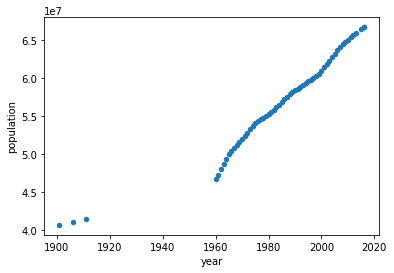

In [0]:
import pandas as pd

dataset = np.loadtxt("population.csv", dtype={'names': ('year', 'population'), 'formats': ('i4', 'i')},
    skiprows=1, delimiter=",", encoding="UTF-8")

df = pd.DataFrame(dataset)
df.plot(x='year', y='population', kind='scatter')

# Data before 1960 is irrelevant because to far apart

[-5.86674085e+08] [[324065.22138837]]


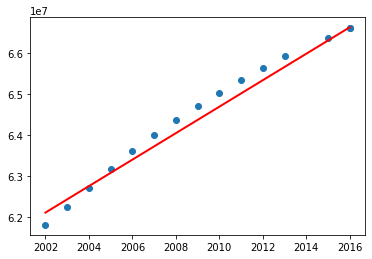

In [0]:
dataset = np.loadtxt("population.csv", dtype={'names': ('year', 'population'), 'formats': ('i4', 'i')},
    skiprows=1, delimiter=",", encoding="UTF-8")

# [4:] removes data before 1940
df = pd.DataFrame(dataset[4:])

#training data
x_train = df['year'][:40].values.reshape(-1, 1)
y_train = df['population'][:40].values.reshape(-1, 1)

#training
lr = LinearRegression()
lr.fit(x_train, y_train)

#printing coefficients
print(lr.intercept_, lr.coef_)

#prediction
x_predict = x_train = df['year'][41:].values.reshape(-1, 1)
y_actual = df['population'][41:].values.reshape(-1, 1)
y_predict = lr.predict(x_predict)

plot.scatter(x_predict, y_actual)
plot.plot(x_predict, y_predict, color='red', linewidth=2)
plot.show()

[-4.30491266e+09] [[ 0.00000000e+00  4.06776344e+06 -9.42279929e+02]]


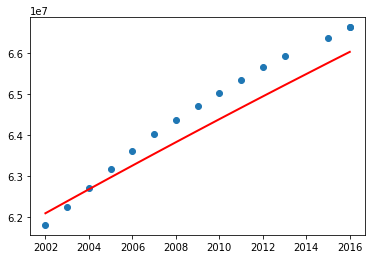

In [0]:
dataset = np.loadtxt("population.csv", dtype={'names': ('year', 'population'), 'formats': ('i4', 'i')},
    skiprows=1, delimiter=",", encoding="UTF-8")

df = pd.DataFrame(dataset[4:])

#training data

x_train = df['year'][:50].values.reshape(-1, 1)
y_train = df['population'][:50].values.reshape(-1, 1)

pf = PolynomialFeatures(degree=2)
x_poly = pf.fit_transform(x_train)

#training
lr = LinearRegression()
lr.fit(x_poly, y_train)

#printing coefficients
print(lr.intercept_, lr.coef_)

#prediction
x_predict = x_train = df['year'][41:].values.reshape(-1, 1)
y_actual = df['population'][41:].values.reshape(-1, 1)
y_predict = lr.predict(pf.fit_transform(x_predict))

plot.scatter(x_predict, y_actual)
plot.plot(x_predict, y_predict, color='red', linewidth=2)
plot.show()

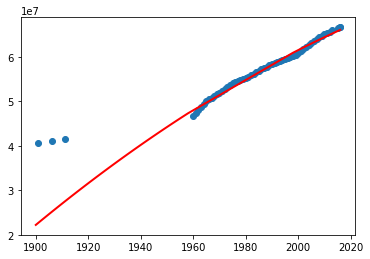

In [0]:
dataset = np.loadtxt("population.csv", dtype={'names': ('year', 'population'), 'formats': ('i4', 'i')},
    skiprows=1, delimiter=",", encoding="UTF-8")

df = pd.DataFrame(dataset)

#training data

x_train = df['year'][:40].values.reshape(-1, 1)
y_train = df['population'][:40].values.reshape(-1, 1)

pf = PolynomialFeatures(degree=2)
x_poly = pf.fit_transform(x_train)

#prediction
x_predict = x_train = df['year'][41:].values.reshape(-1, 1)

# Let's add some more years
x_predict = np.append(range(1900, 1959), x_predict)
x_predict = x_predict.reshape(-1, 1)

y_actual = df['population'][41:].values.reshape(-1, 1)
y_predict = lr.predict(pf.fit_transform(x_predict))

plot.scatter(df['year'], df['population'])
plot.plot(x_predict, y_predict, color='red', linewidth=2)
plot.show()

# With a degree of 2, the curve seem to fit the data,
# but it also seem to start growing exponentially,
# which may not be the case of the real population

In [0]:
# Exercise 3.2
from sklearn.linear_model import Perceptron

numarray = np.array([[0,0,0,0], [0,0,0,1], [0,0,1,0], [0,0,1,1],
                     [0,1,0,0], [0,1,0,1], [0,1,1,0], [0,1,1,1],
                     [1,0,0,0], [1,0,0,1], [1,0,1,0], [1,0,1,1],
                     [1,1,0,0], [1,1,0,1], [1,1,1,0], [1,1,1,1]])
result = np.array([0, 0, 0, 0,
                     0, 0, 0, 0,
                     1, 1, 1, 1,
                     1, 1, 1, 1])

perceptron = Perceptron(max_iter=1000)
perceptron.fit(numarray, result)

x_predict = np.array([[0,1,0,1], [1,0,1,1] ])

y_predict = perceptron.predict(x_predict)
print(y_predict)

[0 1]


In [0]:
numarray = np.array([[0,0,0,0], [0,0,0,1], 
                     [0,1,0,0], [0,1,1,1],
                     [1,0,0,1], [1,0,1,0], 
                     [1,1,1,0], [1,1,1,1]])
result = np.array([0, 0, 
                     0, 0, 
                     1, 1,
                     1, 1])

perceptron = Perceptron(max_iter=1000)
perceptron.fit(numarray, result)

x_predict = np.array([[0,1,0,1], [1,0,1,1], [1,1,0,0], [0,1,0,1]])

y_predict = perceptron.predict(x_predict)
print(y_predict)

[0 1 1 0]


In [0]:
from sklearn.neural_network import MLPClassifier

numarray = np.array([[0,0,0,0], [0,0,0,1], 
                     [0,1,0,0], [0,1,1,1],
                     [1,0,0,1], [1,0,1,0], 
                     [1,1,1,0], [1,1,1,1]])

result = np.array([0, 0, 
                   0, 0, 
                   1, 1,
                   1, 1])

mlpclassifier = MLPClassifier(alpha=2, max_iter=1000)
mlpclassifier.fit(numarray, result)

x_predict = np.array([[0,1,0,1], [1,0,1,1], [1,1,0,0], [0,1,0,1]])

y_predict = mlpclassifier.predict(x_predict)
print(y_predict)

[0 1 1 0]


In [0]:
from sklearn import datasets, svm, metrics

numarray = numarray = np.array([[0,0,0,0], [0,0,0,1], 
                     [0,1,0,0], [0,1,1,1],
                     [1,0,0,1], [1,0,1,0], 
                     [1,1,1,0], [1,1,1,1]])

result = np.array([0, 0, 
                   0, 0, 
                   1, 1,
                   1, 1]) 

svcclassifier = svm.SVC(gamma=0.001, C=100.)
svcclassifier.fit(numarray, result)

x_predict = np.array([[0,1,0,1], [1,0,1,1], [1,1,0,0], [0,1,0,1]])

y_predict = svcclassifier.predict(x_predict)
print(y_predict)

[0 1 1 0]


In [0]:
digits = datasets.load_digits()

print(np.unique(digits.target))

[0 1 2 3 4 5 6 7 8 9]


Number of images:  1797
Input data:  [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
Label: 0


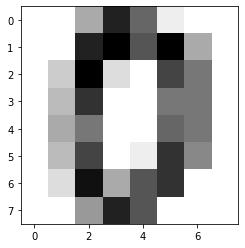

In [0]:
digits = datasets.load_digits()

print("Number of images: ", digits.images.shape[0])
print("Input data: ", digits.images[0])
print("Label:", digits.target[0])

plot.imshow(digits.images[0], cmap=plot.cm.gray_r)
plot.show()

Predicted value:  [4]


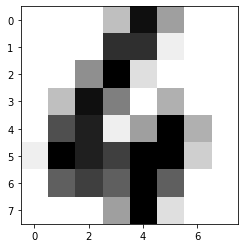

In [0]:
digits = datasets.load_digits()

training_images = digits.images[:int(digits.images.shape[0]/2)]
training_images = training_images.reshape((training_images.shape[0], -1))

training_target = digits.target[:int(digits.target.shape[0]/2)]

classifier = svm.SVC(gamma=0.001, C=100.)
#training
classifier.fit(training_images, training_target)

#prediction
predict_image = digits.images[int(digits.images.shape[0]/2)+2]
print("Predicted value: ", classifier.predict(predict_image.reshape(1,-1)))

plot.imshow(predict_image, cmap=plot.cm.gray_r)
plot.show()

In [0]:
digits = datasets.load_digits()

index_half_set = digits.images.shape[0] // 2

training_images = digits.images[:index_half_set]
training_images = training_images.reshape((training_images.shape[0], -1))

training_target = digits.target[:index_half_set]

classifier = svm.SVC(gamma=0.001, C=100.)
#training
classifier.fit(training_images, training_target)

#prediction
predict_images = digits.images[index_half_set+1:]
actual_labels = digits.target[index_half_set+1:]
predicted_labels = classifier.predict(predict_images.reshape((predict_images.shape[0], -1)))

#classification report
print(metrics.classification_report(actual_labels,predicted_labels))
print(metrics.confusion_matrix(actual_labels,predicted_labels))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.96      0.97        91
           2       0.99      0.99      0.99        86
           3       0.98      0.90      0.94        91
           4       0.99      0.96      0.97        92
           5       0.95      0.96      0.95        91
           6       0.99      0.99      0.99        91
           7       0.98      0.99      0.98        89
           8       0.94      1.00      0.97        87
           9       0.92      0.98      0.95        92

    accuracy                           0.97       898
   macro avg       0.97      0.97      0.97       898
weighted avg       0.97      0.97      0.97       898

[[87  0  0  0  1  0  0  0  0  0]
 [ 0 87  1  0  0  0  0  0  2  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 82  0  3  0  2  4  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 87  1  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0

In [0]:
digits = datasets.load_digits()

index_half_set = digits.images.shape[0] // 2

training_images = digits.images[:index_half_set]
training_images = training_images.reshape((training_images.shape[0], -1))

training_target = digits.target[:index_half_set]

classifier = Perceptron(max_iter=1000)
#training
classifier.fit(training_images, training_target)

#prediction
predict_images = digits.images[index_half_set+1:]
actual_labels = digits.target[index_half_set+1:]
predicted_labels = classifier.predict(predict_images.reshape((predict_images.shape[0], -1)))

#classification report
print(metrics.classification_report(actual_labels,predicted_labels))
print(metrics.confusion_matrix(actual_labels,predicted_labels))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        88
           1       0.79      0.91      0.85        91
           2       0.98      0.97      0.97        86
           3       0.95      0.84      0.89        91
           4       0.95      0.90      0.93        92
           5       0.83      0.92      0.87        91
           6       0.97      0.99      0.98        91
           7       0.98      0.92      0.95        89
           8       0.94      0.74      0.83        87
           9       0.83      0.90      0.86        92

    accuracy                           0.91       898
   macro avg       0.91      0.91      0.91       898
weighted avg       0.91      0.91      0.91       898

[[86  0  0  0  1  1  0  0  0  0]
 [ 0 83  0  1  0  0  0  0  1  6]
 [ 3  0 83  0  0  0  0  0  0  0]
 [ 0  4  0 76  0  5  0  2  2  2]
 [ 3  2  0  0 83  0  2  0  0  2]
 [ 0  3  0  0  0 84  1  0  0  3]
 [ 0  0  1  0  0  0 90  0  0  0]
 [ 0  1  0

In [0]:
digits = datasets.load_digits()

training_images = digits.images[:int(digits.images.shape[0]/2)]
training_images = training_images.reshape((training_images.shape[0], -1))

training_target = digits.target[0:int(digits.target.shape[0]/2)]

classifier = MLPClassifier(alpha=2, max_iter=1000)
#training
classifier.fit(training_images, training_target)

#prediction
predict_images = digits.images[int(digits.images.shape[0]/2)+1:]
actual_labels = digits.target[int(digits.target.shape[0]/2)+1:]
predicted_labels = classifier.predict(predict_images.reshape((predict_images.shape[0], -1)))

#classification report
print(metrics.classification_report(actual_labels,predicted_labels))
print(metrics.confusion_matrix(actual_labels,predicted_labels))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        88
           1       0.93      0.91      0.92        91
           2       1.00      0.98      0.99        86
           3       0.95      0.85      0.90        91
           4       0.99      0.92      0.96        92
           5       0.91      0.96      0.93        91
           6       0.96      0.99      0.97        91
           7       0.98      0.99      0.98        89
           8       0.93      0.92      0.92        87
           9       0.85      0.97      0.90        92

    accuracy                           0.95       898
   macro avg       0.95      0.95      0.95       898
weighted avg       0.95      0.95      0.95       898

[[86  0  0  0  1  0  1  0  0  0]
 [ 0 83  0  1  0  0  0  0  1  6]
 [ 0  0 84  2  0  0  0  0  0  0]
 [ 0  0  0 77  0  5  0  2  5  2]
 [ 1  0  0  0 85  0  2  0  0  4]
 [ 0  0  0  0  0 87  1  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0

In [0]:
# Did you try changing the number of hidden layers?
# The results are almost identical
# What are your observations after trying the different classifiers?
# The SVC gives better results, quickly

In [0]:
# Exercise 3.3
from sklearn import tree
data = [[0, 0], 
        [1, 1],
        [1, 0]]
result = [1, 0, 1]
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(data, result)
print(dtc.predict([[1, 1]]))

[0]


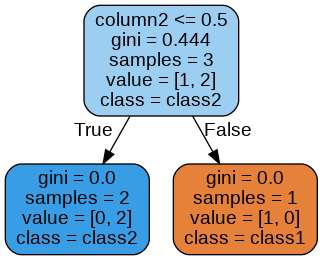

In [0]:
import graphviz
import pydotplus
from IPython.display import Image, display

data = [[0, 0], 
        [1, 1],
        [1, 0]]
result = [1, 0, 1]
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(data, result)

dot_data = tree.export_graphviz(dtc, out_file=None,
                                feature_names=['column1', 'column2'],
                                filled=True, rounded=True, 
                                class_names = ['class1', 'class2']
                                ) 
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
img = Image(pydot_graph.create_png())
display(img)

In [0]:
from sklearn.preprocessing import LabelEncoder

data = [
        ['green', 'nature', 'thumbnail', 'landscape'], 
        ['blue', 'architecture', 'medium', 'portrait'],
        ['blue', 'people', 'medium', 'landscape'],
        ['yellow', 'nature', 'medium', 'portrait'],
        ['green', 'nature', 'thumbnail', 'landscape'],
        ['blue', 'people', 'medium', 'landscape'],
        ['blue', 'nature', 'thumbnail', 'portrait'],
        ['yellow', 'architecture', 'thumbnail', 'landscape'],
        ['blue', 'people', 'medium', 'portrait'],
        ['yellow', 'nature', 'medium', 'landscape'],
        ['yellow', 'people', 'thumbnail', 'portrait'],
        ['blue', 'people', 'medium', 'landscape'],
        ['red', 'architecture', 'thumbnail','landscape']]
result = [
          'Favorite',
          'NotFavorite',
          'Favorite',
          'Favorite',
          'Favorite',
          'Favorite',
          'Favorite',
          'NotFavorite',
          'NotFavorite',
          'Favorite',
          'Favorite',
          'NotFavorite',
          'NotFavorite'
          ]


#creating dataframes
dataframe = pd.DataFrame(data, columns=['color', 'tag', 'size', 'mode'])
resultframe = pd.DataFrame(result, columns=['favorite'])

#generating numerical labels
le1 = LabelEncoder()
dataframe['color'] = le1.fit_transform(dataframe['color'])

le2 = LabelEncoder()
dataframe['tag'] = le2.fit_transform(dataframe['tag'])

le3 = LabelEncoder()
dataframe['size'] = le3.fit_transform(dataframe['size'])

le4 = LabelEncoder()
dataframe['mode'] = le4.fit_transform(dataframe['mode'])

le5 = LabelEncoder()
resultframe['favorite'] = le5.fit_transform(resultframe['favorite'])

#Use of decision tree classifiers
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(dataframe, resultframe)

#prediction
prediction = dtc.predict([
    [le1.transform(['red'])[0], le2.transform(['nature'])[0],
     le3.transform(['thumbnail'])[0], le4.transform(['portrait'])[0]]])
print(le5.inverse_transform(prediction))
print(dtc.feature_importances_)

# The tag is the most important feature of the picture

['Favorite']
[0.16595745 0.61276596 0.08297872 0.13829787]


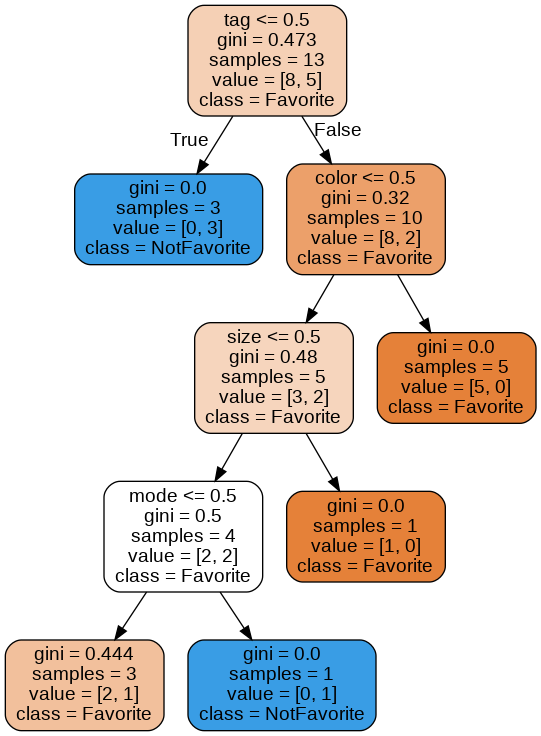

In [0]:
dot_data = tree.export_graphviz(dtc, out_file=None,
                     feature_names=dataframe.columns,
                     filled=True, rounded=True, 
                     class_names =
                     le5.inverse_transform(
                       resultframe.favorite.unique())
                    ) 
graph = graphviz.Source(dot_data) 
 
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
img = Image(pydot_graph.create_png())
display(img)

In [0]:
from sklearn.ensemble import RandomForestClassifier

nb_tree = 10

#Use of random forest classifier
rfc = RandomForestClassifier(n_estimators=nb_tree, max_depth=2,
                             random_state=0)
rfc = rfc.fit(dataframe, resultframe.values.ravel())

#prediction

# https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76
# At test time, predictions are made by averaging the predictions of each decision tree
prediction = rfc.predict([
    [le1.transform(['red'])[0], le2.transform(['nature'])[0],
     le3.transform(['thumbnail'])[0], le4.transform(['portrait'])[0]]])
print(le5.inverse_transform(prediction))
print(rfc.feature_importances_)

['Favorite']
[0.28475872 0.54335851 0.10117429 0.07070848]


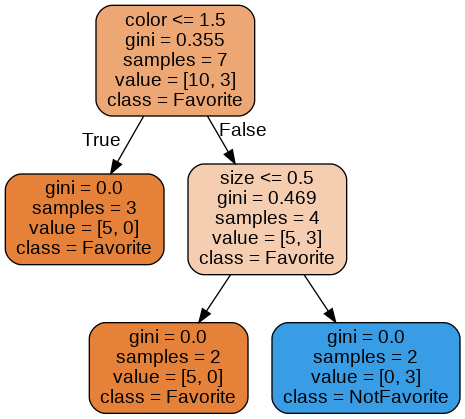

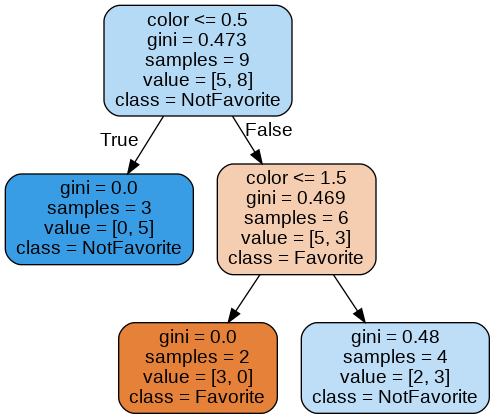

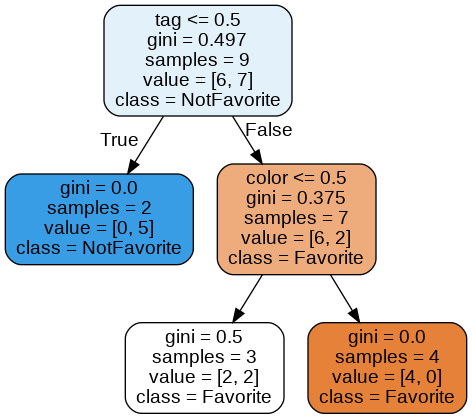

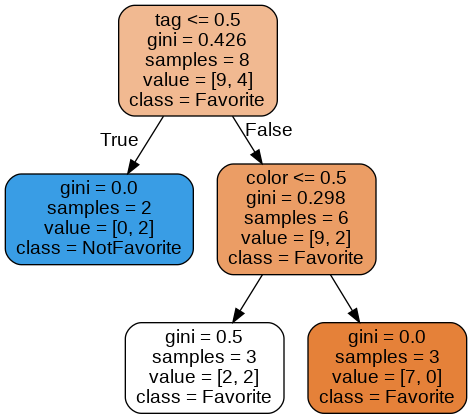

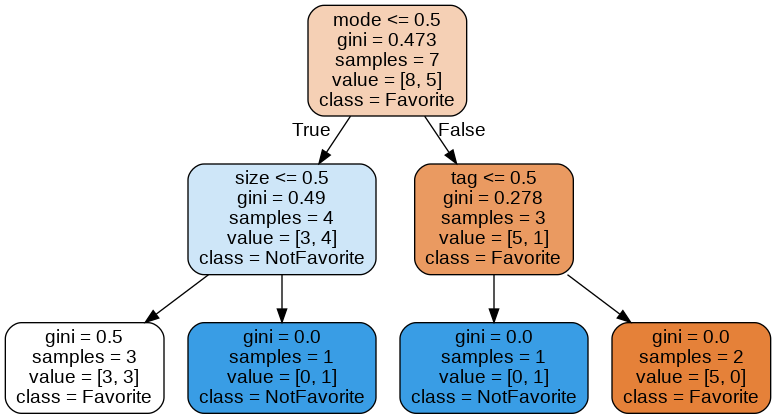

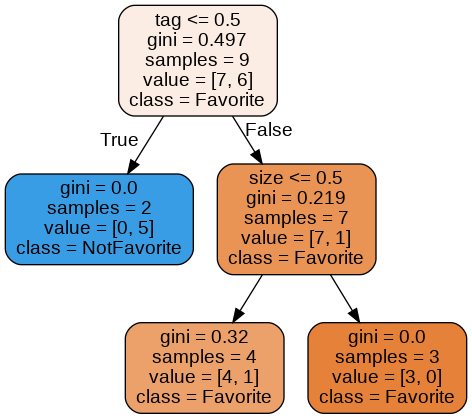

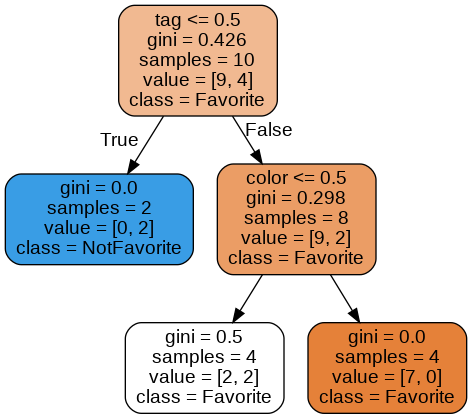

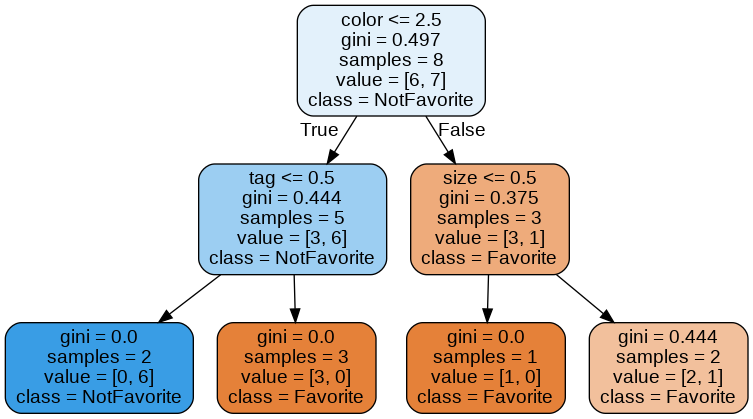

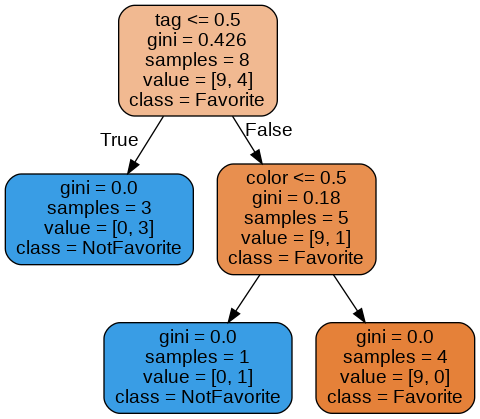

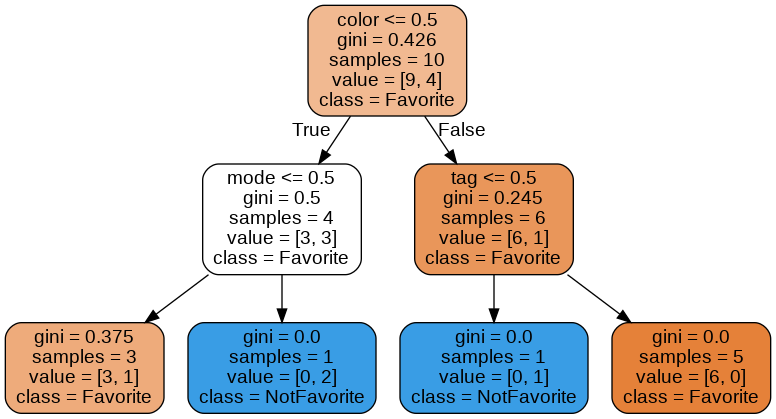

In [0]:
for i in range(nb_tree):
    dot_data = tree.export_graphviz(rfc.estimators_[i], out_file=None,
                   feature_names=dataframe.columns,
                   filled=True, rounded=True,
                   class_names =
                    le5.inverse_transform(
                      resultframe.favorite.unique())
                   ) 
    graph = graphviz.Source(dot_data) 
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    img = Image(pydot_graph.create_png())
    display(img)

In [0]:
# Exercise 3.4
digits = datasets.load_digits()
training_size = digits.images.shape[0] // 2

training_images = digits.images[:training_size]
training_images = training_images.reshape((training_images.shape[0], -1))

training_target = digits.target[:training_size]

classifier = Perceptron(max_iter=1000)
#training
for i in range(training_size):
    training_data = np.array(training_images[i])
    training_data = training_data.reshape(1, -1)
    classifier.partial_fit(training_data, [training_target[i]], classes=np.unique(digits.target))

#prediction
predict_images = digits.images[training_size+1:]
actual_labels = digits.target[training_size+1:]
predicted_labels = classifier.predict(predict_images.reshape((predict_images.shape[0], -1)))

#classification report
print(metrics.classification_report(actual_labels,predicted_labels))

# The results aren't accurate
# A higher training size increases the accuracy

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        88
           1       1.00      0.44      0.61        91
           2       0.77      1.00      0.87        86
           3       0.95      0.77      0.85        91
           4       0.78      0.90      0.83        92
           5       0.75      0.92      0.83        91
           6       0.89      0.99      0.94        91
           7       1.00      0.88      0.93        89
           8       0.80      0.80      0.80        87
           9       0.79      0.89      0.84        92

    accuracy                           0.85       898
   macro avg       0.87      0.85      0.84       898
weighted avg       0.87      0.85      0.84       898



In [0]:
classifier = MLPClassifier(alpha=2, max_iter=1000)
#training
classifier.fit(training_images, training_target)

#prediction
predict_images = digits.images[training_size+1:]
actual_labels = digits.target[training_size+1:]
predicted_labels = classifier.predict(predict_images.reshape((predict_images.shape[0], -1)))

#classification report
print(metrics.classification_report(actual_labels,predicted_labels))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        88
           1       0.95      0.91      0.93        91
           2       1.00      0.99      0.99        86
           3       0.96      0.86      0.91        91
           4       0.99      0.93      0.96        92
           5       0.92      0.96      0.94        91
           6       0.96      0.99      0.97        91
           7       0.98      0.99      0.98        89
           8       0.90      0.94      0.92        87
           9       0.87      0.96      0.91        92

    accuracy                           0.95       898
   macro avg       0.95      0.95      0.95       898
weighted avg       0.95      0.95      0.95       898



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fd512399e10>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpbwsl7ypm', '_session_creation_timeout_secs': 7200}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done run

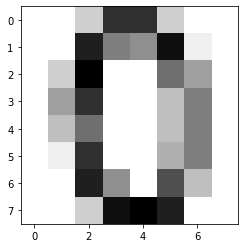

In [0]:
# Exercise 3.5
%tensorflow_version 1.x
import tensorflow as tf

classifier = tf.contrib.learn.DNNClassifier(
     feature_columns=[tf.contrib.layers.real_valued_column("", dtype=tf.float64)],
     # 2 hidden layers of 50 nodes each
     hidden_units=[100, 100, 100],
     # 10 classes: 0, 1, 2...9
     n_classes=10)

#training
classifier.fit(training_images, training_target, steps=100)

#prediction
predict_images = digits.images[training_size+1:]

predict = classifier.predict(predict_images[16].reshape(1,-1))
print(list(predict))
plot.imshow(predict_images[16], cmap=plot.cm.gray_r)
plot.show()

In [0]:
#prediction
predict_images = digits.images[training_size+1:]
actual_labels = digits.target[training_size+1:]
evaluation = classifier.evaluate(x=predict_images.reshape((predict_images.shape[0], -1)), y=actual_labels)
print(evaluation['accuracy'])
# The accuracy increases slightly with more neurons and layers

INFO:tensorflow:Starting evaluation at 2020-03-29T14:38:10Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpbwsl7ypm/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-03-29-14:38:10
INFO:tensorflow:Saving dict for global step 100: accuracy = 0.93318486, global_step = 100, loss = 0.22922552
0.93318486
